# Lab6

In [ ]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab6.py
# Author      : Dilan Castañeda                                             
# Created On  : October 04, 2024                                           
# Last Update : October 04, 2024                                         
# Version     : 1.0.0                                          
# Description : ANOVA and Tukey Test
# ─────────────────────────────────────────────────────────────────────────────

In [30]:
# Importing Libraries
# !pip install bioinfokit
# !pip install pingouin
import pingouin as pg
from bioinfokit.analys import stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 1. Descarga o copia el dataset

El dataser esta en el siguiente sitio: https://www.reneshbedre.com/assets/posts/anova/onewayanova.txt

In [10]:
# Load the .txt file into a DataFrame
df = pd.read_csv('https://www.reneshbedre.com/assets/posts/anova/onewayanova.txt', delimiter='\t')

df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


## 2. Acondiciona los datos para que tengan el siguiente formato de dataframe: (y poderlo utilizar con statsmodels)

In [13]:
# Data Preprocessing
df_acon = pd.DataFrame(df).melt(var_name='Treatment', value_name='Value')
df_acon.head()

,Treatment,Value
0,A,25
1,A,30
2,A,28
3,A,36
4,A,29


## 3. Hacer boxplots para los tratamientos

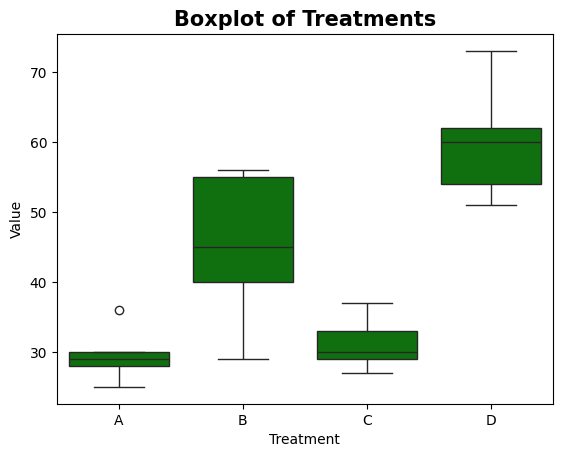

In [18]:
# Boxplot of Treatments
sns.boxplot(x='Treatment', y='Value', data=df_acon, color='green')
plt.title('Boxplot of Treatments', fontsize=15, fontweight='bold')
plt.show()

## 4. Haz la prueba ANOVA con 3 formas diferentes:

In [28]:
# ANOVA using statsmodels
model = ols('Value ~ Treatment', data=df_acon).fit()
anova = sm.stats.anova_lm(model, typ=2)

# ANOVA Table
print("Statsmodels ANOVA:")
anova

Statsmodels ANOVA:


,sum_sq,df,F,PR(>F)
Treatment,3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [26]:
# ANOVA using bioinfokit
output = stat()
output.anova_stat(df=df_acon, anova_model='Value ~ C(Treatment)')

# ANOVA Table
print("Bioinfokit ANOVA:")
output.anova_summary

Bioinfokit ANOVA:


,df,sum_sq,mean_sq,F,PR(>F)
C(Treatment),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [27]:
# ANOVA using pingouin
anova_pingouin = pg.anova(dv='Value', between='Treatment', data=df_acon, detailed=True)

# ANOVA Table
print("Pingouin ANOVA:")
anova_pingouin

Pingouin ANOVA:


,Source,SS,DF,MS,F,p-unc,np2
0,Treatment,3010.95,3,1003.650,17.49281,0.000026,0.76635
1,Within,918.00,16,57.375,NaN,NaN,NaN


## 5. Haz la prueba de Tukey (Honest Significant Difference) para determinar los pares de medias que son diferentes

In [33]:
# Prueba de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_acon['Value'], groups=df_acon['Treatment'], alpha=0.05)

# Tukey HSD Results
print("\nTukey HSD Results:")
tukey.summary()


Tukey HSD Results:


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,15.4,0.0251,1.694,29.106,True
A,C,1.6,0.9867,-12.106,15.306,False
A,D,30.4,0.0001,16.694,44.106,True
B,C,-13.8,0.0482,-27.506,-0.094,True
B,D,15.0,0.0296,1.294,28.706,True
C,D,28.8,0.0001,15.094,42.506,True
